### GITHUB setup instructions are in a separate notebook

#### it's published on the github repo

# RANDOM FOREST MODEL FOR NBA ROOKIE PLAYERS

# Load Packages

In [1]:
# Load the packages needed for Logistic Regression Modelling upfront
import pandas as pd
import numpy as np
import seaborn as sns
from chart_studio import plotly as plt

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection   import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_auc_score

from joblib import dump

# Load the data

In [2]:
# Load the training data set
train = pd.read_csv('/Users/jasle1/Desktop/MDSI/ADSI/AT_1/adsi_at1/data/raw/train.csv')

In [3]:
# Load the test data set
test = pd.read_csv('/Users/jasle1/Desktop/MDSI/ADSI/AT_1/adsi_at1/data/raw/test.csv')

# Explore the Data

In [153]:
# check rows and columns of the training set
train.shape

(8000, 21)

In [154]:
# check rows and columns of the test set
test.shape

(3799, 20)

In [155]:
train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [156]:
test.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


In [10]:
train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [82]:
# https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
# class count
class_count_0, class_count_1 = train['TARGET_5Yrs'].value_counts()

# Separate class
class_0 = train[train['TARGET_5Yrs'] == 0]
class_1 = train[train['TARGET_5Yrs'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1331, 21)
class 1: (6669, 21)


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Fail'), Text(1, 0, 'Succeed')]

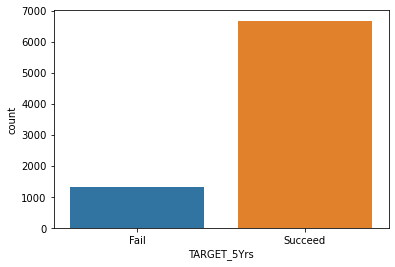

In [79]:
# https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
# visualize the target variable
g = sns.countplot(train['TARGET_5Yrs'])
g.set_xticklabels(['Fail','Succeed'])
#plt.show()

# Transform the Data

In [4]:
# extract the target variable out as y = target
y_train = train.pop('TARGET_5Yrs')
y_train.shape

(8000,)

In [5]:
# create a copy of test set for use later for submission file, if data is scaled
test_ID = test.copy()
test_ID

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,8175,84,21.2,8.7,3.4,6.7,50.2,0.0,-0.0,-4.5,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,8176,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,8178,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,8181,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [6]:
# Standardise the dataset
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [7]:
# Split the training data into train and validation sets for evaluation
# set the validation set at 20% of the full training set
X_train, X_val, y_train, y_val = train_test_split(train, y_train, test_size=0.2, random_state = 42)

# Run Grid Search AND Train Logistic Regression Model

In [8]:
# Version 1
rf1 = RandomForestClassifier(random_state = 42, class_weight='balanced')

rf_params1 = {}

model1 = GridSearchCV(rf1, param_grid = rf_params1, cv=3, verbose = 1)

model1.fit(X_train, y_train)

print(f'CrossVal Score: {model1.best_score_}')
print(f'Training Score: {model1.score(X_train, y_train)}')
print(f'Testing Score: {model1.score(X_val, y_val)}')
print(model1.best_params_)
# takes 3 sec

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CrossVal Score: 0.8320309976971858
Training Score: 1.0
Testing Score: 0.833125
{}


In [10]:
# Version 2
rf2 = RandomForestClassifier(random_state = 42, class_weight='balanced')

rf_params2 = {'n_estimators': [5, 10, 15, 20, 30, 40, 50, 60, 70],
             'max_depth': [None, 50],
             'min_samples_split': [2, 3, 5, 7],
             'min_samples_leaf': [1, 2, 3, 4]}

model2 = GridSearchCV(rf2, param_grid=rf_params2, cv=3, verbose = 1)

model2.fit(X_train, y_train)

print(f'CrossVal Score: {model2.best_score_}')
print(f'Training Score: {model2.score(X_train, y_train)}')
print(f'Testing Score: {model2.score(X_val, y_val)}')
print(model2.best_params_)
# takes 3min

Fitting 3 folds for each of 288 candidates, totalling 864 fits
CrossVal Score: 0.8318750162023032
Training Score: 0.999375
Testing Score: 0.831875
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [127]:
# Version 3 - Using Imbalanced-learn package
rf3 = BalancedRandomForestClassifier(random_state = 42, class_weight='balanced')

rf_params3 = {}

model3 = GridSearchCV(rf3, param_grid = rf_params3, cv=3, verbose = 1)

model3.fit(X_train, y_train)

print(f'CrossVal Score: {model3.best_score_}')
print(f'Training Score: {model3.score(X_train, y_train)}')
print(f'Testing Score: {model3.score(X_val, y_val)}')
print(model3.best_params_)
# takes 2 sec

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CrossVal Score: 0.6456247630069893
Training Score: 0.80796875
Testing Score: 0.64625
{}


In [128]:
# Version 4 - Using Imbalanced-learn package
rf4 = BalancedRandomForestClassifier(random_state = 42, class_weight='balanced')

rf_params4 = {'n_estimators': [5, 10, 15, 20, 30, 40, 50, 60, 70],
             'max_depth': [None, 50],
             'min_samples_split': [2, 3, 5, 7],
             'min_samples_leaf': [1, 2, 3, 4]}

model4 = GridSearchCV(rf4, param_grid=rf_params4, cv=3, verbose = 1)

model4.fit(X_train, y_train)

print(f'CrossVal Score: {model4.best_score_}')
print(f'Training Score: {model4.score(X_train, y_train)}')
print(f'Testing Score: {model4.score(X_val, y_val)}')
print(model4.best_params_)
# takes 2min

Fitting 3 folds for each of 288 candidates, totalling 864 fits
CrossVal Score: 0.6468740795810264
Training Score: 0.80234375
Testing Score: 0.6425
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


In [11]:
# Make predictions on the validation dataset
val_pred = model2.predict_proba(X_val)
val_pred

array([[0.1 , 0.9 ],
       [0.24, 0.76],
       [0.18, 0.82],
       ...,
       [0.08, 0.92],
       [0.06, 0.94],
       [0.  , 1.  ]])

# Evaluate Model Performance

In [12]:
# Calculate auc scores for performance evaluation
auc_score = roc_auc_score(y_val, val_pred[:,1])

print(f'The Random Forest ROC AUC score is {auc_score}')

The Random Forest ROC AUC score is 0.6676103642739121


In [13]:
# Make predictions on the test set now
test_pred = model2.predict_proba(test)
test_pred

array([[0.26, 0.74],
       [0.22, 0.78],
       [0.2 , 0.8 ],
       ...,
       [0.3 , 0.7 ],
       [0.2 , 0.8 ],
       [0.14, 0.86]])

In [107]:
# *** save scaler in the models folder called "scaler.joblib" for use next time
dump(model2, '/Users/jasle1/Desktop/MDSI/ADSI/AT_1/adsi_at1/models/rf_gs_scaled_balanced_2.9.joblib')

['/Users/jasle1/Desktop/MDSI/ADSI/AT_1/adsi_at1/models/rf_gs_scaled_balanced_2.9.joblib']

In [19]:
train.columns

Index(['Id', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [20]:
features = ['Id', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']

In [23]:
# https://github.com/lwinter819/Capstone/blob/59a003dbc8a54a9c4e62349018e04cbf63d4ac50/Code/Modeling.ipynb
# https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
#Checking which features had the most importance in the random forest model
best_features = pd.DataFrame(model2.best_estimator_.feature_importances_.reshape(1,20), columns = features).T
best_features.rename(columns = {0: 'feature_importance'}, inplace = True)
best_features.sort_values(by = 'feature_importance', ascending = False)


,feature_importance
GP,0.095915
FG%,0.070063
Id,0.064304
3P%,0.061498
FT%,0.061365
MIN,0.058678
PTS,0.052692
FGA,0.049852
FTA,0.048177
REB,0.047690


AttributeError: module 'chart_studio.plotly' has no attribute 'xlabel'

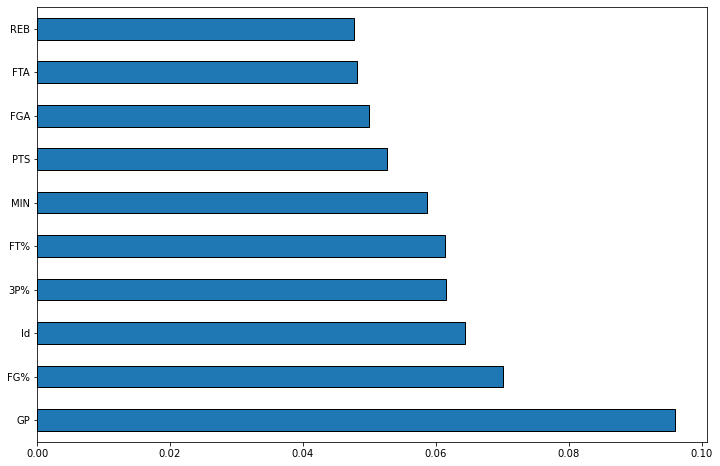

In [27]:
# plot the best features
best_features.sort_values(by = 'feature_importance', ascending = False).head(10).plot(kind = 'barh', 
                                                                                      figsize = (12,8),
                                                                                      legend = False,
                                                                                      edgecolor = 'black')
plt.xlabel('Feature Importance', size = 18)
plt.ylabel('Features', size = 18)
plt.title('Most Important Features', size = 22)
plt.xticks(size = 14)
plt.yticks(size = 14);

# Prepare the file for extracting final prediction output - for Kaggle submission

In [108]:
# Convert the datasets into pandas dataframe for easy merge with prediction file
test_id = pd.DataFrame(test_ID.iloc[:,0])
test_id

,Id
0,1
1,8194
2,3
3,8196
4,8197
...,...
3794,8175
3795,8176
3796,8178
3797,8181


In [109]:
# Convert the datasets into pandas dataframe for easy merge with prediction file
test_pred = pd.DataFrame(test_pred[:,1])
test_pred.head()
# it seems that the framework is giving out prediction for both yes and no

,0
0,0.80
1,0.73
2,0.84
3,0.98
4,0.76


In [110]:
# Now, merge the test data set with predictions data
df = pd.concat([test_id, test_pred], axis=1)
df.head()

,Id,0
0,1,0.80
1,8194,0.73
2,3,0.84
3,8196,0.98
4,8197,0.76


In [111]:
# Rename the '0' prediction column to align with Kaggle submission requirements
df_final = df.rename(columns={0: 'TARGET_5Yrs'})
df_final.head()

,Id,TARGET_5Yrs
0,1,0.80
1,8194,0.73
2,3,0.84
3,8196,0.98
4,8197,0.76


In [112]:
# Extract the ID and Prediction columns for Kaggle Submission
submission = df_final[['Id', 'TARGET_5Yrs']]
submission.head()

,Id,TARGET_5Yrs
0,1,0.80
1,8194,0.73
2,3,0.84
3,8196,0.98
4,8197,0.76


In [113]:
# save the submission file for kaggle upload
submission.to_csv('jasleen_rf_gs_scaled_balanced_week_2.9', index=False)